In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.shape

(7267, 6)

# 1. Limpeza dos Dados e Colunas

In [6]:
# Valores ausentes
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [7]:
customer_df = df['customer']
customer_df

,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."
...,...
7262,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
7263,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7264,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
7265,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


In [8]:
customer_df = pd.json_normalize(df['customer'])
customer_df

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [9]:
phone_df = pd.json_normalize(df['phone'])
phone_df

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [10]:
internet_df = pd.json_normalize(df['internet'])
internet_df

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [11]:
account_df = pd.json_normalize(df['account'])
account_df

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [12]:
# Concatenação das colunas
df_clean = pd.concat([df['customerID'], df['Churn'], customer_df, phone_df, internet_df, account_df], axis=1)
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
df_clean['gender'].value_counts()

,count
gender,
Male,3675
Female,3592


In [14]:
df_clean['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [15]:
df_clean['MultipleLines'].value_counts()

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [16]:
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No phone service': 'No'})
df_clean['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [18]:
df_clean['Charges.Total'] = pd.to_numeric(df_clean['Charges.Total'], errors='coerce')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [19]:
df_clean.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [20]:
df_clean = df_clean.dropna()
df_clean.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [21]:
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [22]:
# Colunas de contas diárias
df_clean['DailyCharges'] = df_clean['Charges.Monthly'] / 30
df_clean.head()

<ipython-input-22-6945be298e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DailyCharges'] = df_clean['Charges.Monthly'] / 30


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [23]:
df_clean['DailyCharges'] = df_clean['DailyCharges'].round(2)
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DailyCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


 # 2. Padronização e Transformação de Dados



In [24]:
import re

In [25]:
def padronizar_colunas(colunas):
  colunas_format = []
  for col in colunas:
    coluna_format = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', '_', col)
    coluna_format = re.sub(r'[ .\-]+', '_', coluna_format)
    coluna_format = coluna_format.lower()
    coluna_format = coluna_format.strip('_')
    colunas_format.append(coluna_format)
  return colunas_format
df_clean.columns = padronizar_colunas(df_clean.columns)

In [26]:
df_clean.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


# 3. Análise Descritiva

In [27]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7256.0,0.162900,0.369300,0.00,0.000,0.00,0.0,1.00
tenure,7256.0,32.395535,24.558067,1.00,9.000,29.00,55.0,72.00
charges_monthly,7256.0,64.755423,30.125739,18.25,35.450,70.30,89.9,118.75
charges_total,7256.0,2280.634213,2268.632997,18.80,400.225,1391.00,3785.3,8684.80
daily_charges,7256.0,2.158467,1.004282,0.61,1.180,2.34,3.0,3.96


In [28]:
# Mediana
df_clean.median(numeric_only=True)

,0
senior_citizen,0.00
tenure,29.00
charges_monthly,70.30
charges_total,1391.00
daily_charges,2.34


In [29]:
# Moda
df_clean.mode().iloc[0]

,0
customer_id,0002-ORFBO
churn,No
gender,Male
senior_citizen,0.0
partner,No
dependents,No
tenure,1.0
phone_service,Yes
multiple_lines,No
internet_service,Fiber optic


In [30]:
# Assimetria
df_clean.skew(numeric_only=True)

,0
senior_citizen,1.826123
tenure,0.237761
charges_monthly,-0.218065
charges_total,0.964218
daily_charges,-0.218076


In [31]:
# Curtose
df_clean.kurtosis(numeric_only=True)

,0
senior_citizen,1.335094
tenure,-1.389420
charges_monthly,-1.260469
charges_total,-0.230473
daily_charges,-1.260356


In [32]:
# Análise de Churn
df_clean['churn'].value_counts(normalize=True) * 100

,proportion
churn,
No,71.154906
Yes,25.757993
,3.087100


In [33]:
print(df_clean['churn'].unique())

['No' 'Yes' '']


In [34]:
df_clean = df_clean[df_clean['churn'].isin(['Yes', 'No'])]
print(df_clean['churn'].unique())

['No' 'Yes']


In [35]:
df_clean.groupby('churn').mean(numeric_only=True).round(2)

,senior_citizen,tenure,charges_monthly,charges_total,daily_charges
churn,,,,,
No,0.13,37.65,61.31,2555.34,2.04
Yes,0.25,17.98,74.44,1531.80,2.48


In [36]:
# Análise por Segmentos
df_clean.groupby('contract')['charges_monthly'].mean().round(2)

,charges_monthly
contract,
Month-to-month,66.40
One year,65.08
Two year,60.87


In [37]:
df_clean.groupby(['internet_service', 'churn']).size().unstack()

churn,No,Yes
internet_service,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [38]:
churn_contract = df_clean.groupby('contract')['churn'].value_counts(normalize=True).unstack() * 100
churn_contract.round(2)

churn,No,Yes
contract,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85


# 4. Distribuição da Evasão da Variável 'churn'

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

In [60]:
churn_counts = df_clean['churn'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=churn_counts.index,
    values=churn_counts.values,
    hole=.5,
    textinfo='label+percent',
    marker=dict(colors=['#66b3ff', '#ff9999'],
                line=dict(color='white', width=4))
    )])
fig.update_layout(
    title='Proporção de Clientes: Permaneceram vs. Saíram',
    title_font_size=18,
    title_font_weight='bold',
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    )
fig.show()

<ipython-input-69-de09bf8d1c6a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




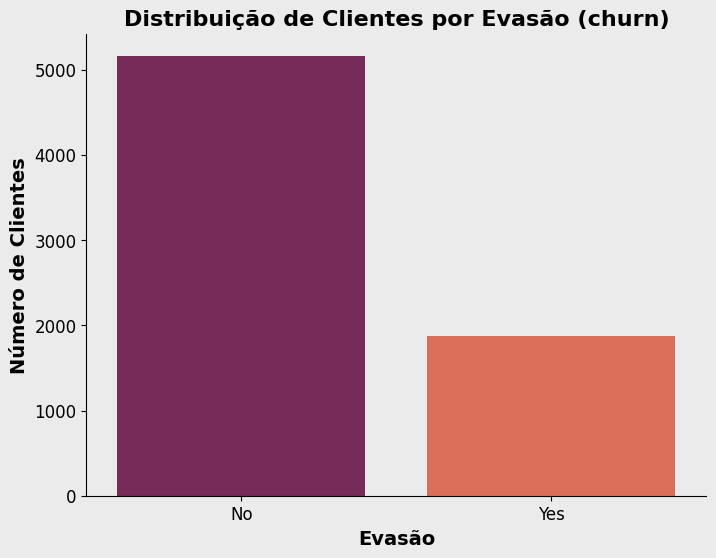

In [69]:
plt.figure(figsize=(8, 6), facecolor="#ebebeb")
ax = plt.axes()
ax.set_facecolor("#ebebeb")
sns.countplot(data=df_clean, x='churn', palette='rocket')
plt.title('Distribuição de Clientes por Evasão (churn)', fontsize=16, weight='bold')
plt.xlabel('Evasão', fontsize=14, weight='bold')
plt.ylabel('Número de Clientes', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

<ipython-input-88-0df6f715bc62>:18: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



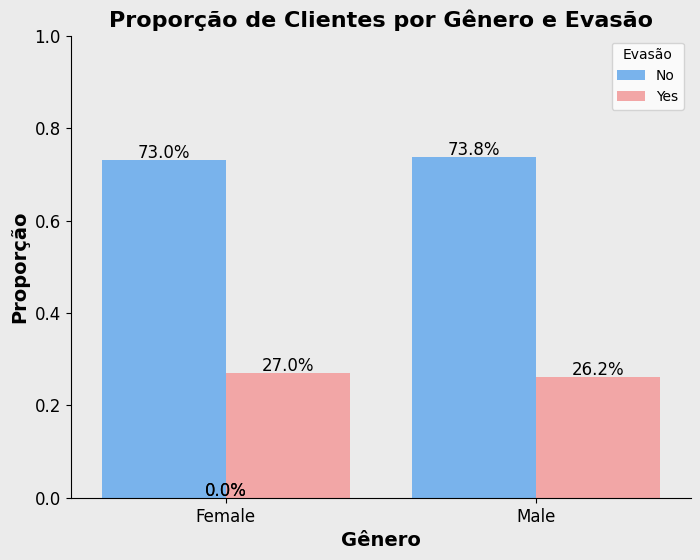

In [88]:
# Análise de churn por Gênero
gender_churn = df_clean.groupby(['gender', 'churn']).size().reset_index(name='count')
gender_total = gender_churn.groupby('gender')['count'].transform('sum')
gender_churn['percentage'] = gender_churn['count'] / gender_total

palette = {
    ('Female', 'No'): '#66b3ff',
    ('Female', 'Yes'): '#ff9999',
    ('Male', 'No'): '#66b3ff',
    ('Male', 'Yes'): '#ff9999'
}

gender_churn['combo'] = list(zip(gender_churn['gender'], gender_churn['churn']))

plt.figure(figsize=(8, 6), facecolor="#ebebeb")
ax = plt.axes()
ax.set_facecolor("#ebebeb")
bars = sns.barplot(
    data=gender_churn,
    x='gender',
    y='percentage',
    hue='churn',
    palette=[palette[combo] for combo in gender_churn['combo']]
    )

for p in bars.patches:
    height = p.get_height()
    bars.annotate(
        f'{p.get_height() * 100:.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=12,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Proporção de Clientes por Gênero e Evasão', fontsize=16, weight='bold')
plt.xlabel('Gênero', fontsize=14, weight='bold')
plt.ylabel('Proporção', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Evasão', loc='upper right')
ax.spines[['top', 'right']].set_visible(False)
plt.ylim(0, 1)
plt.show()

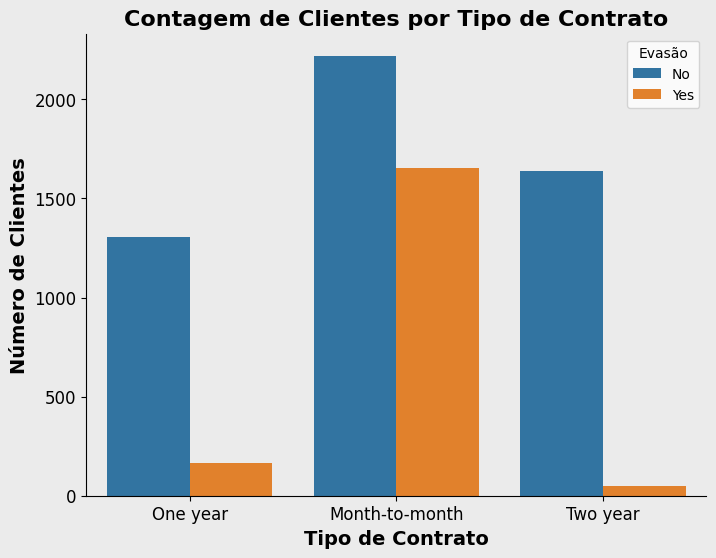

In [90]:
# Análise churn por Tipo de Contrato

plt.figure(figsize=(8, 6), facecolor="#ebebeb")
ax = plt.axes()
ax.set_facecolor("#ebebeb")
sns.countplot(data=df_clean, x='contract', hue='churn', palette='tab10')
plt.title('Contagem de Clientes por Tipo de Contrato', fontsize=16, weight='bold')
plt.xlabel('Tipo de Contrato', fontsize=14, weight='bold')
plt.ylabel('Número de Clientes', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Evasão', loc='upper right')
ax.spines[['top', 'right']].set_visible(False)
plt.show()

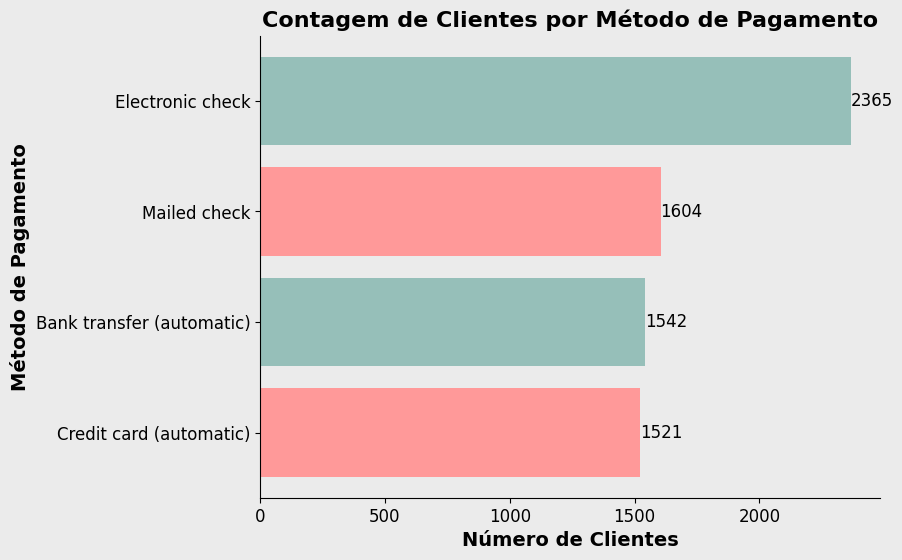

In [94]:
# Análise churn por Método de Pagamento

plt.figure(figsize=(8, 6), facecolor="#ebebeb")
ax = plt.axes()
ax.set_facecolor("#ebebeb")
bars = plt.barh(df_clean['payment_method'].value_counts().index, df_clean['payment_method'].value_counts().values, color=["#96bfb9", '#ff9999'])
plt.title('Contagem de Clientes por Método de Pagamento', fontsize=16, weight='bold')
plt.xlabel('Número de Clientes', fontsize=14, weight='bold')
plt.ylabel('Método de Pagamento', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
ax.spines[['top', 'right']].set_visible(False)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', ha='left', va='center', fontsize=12)


plt.show()

In [99]:
from re import template
from matplotlib.colors import ListedColormap

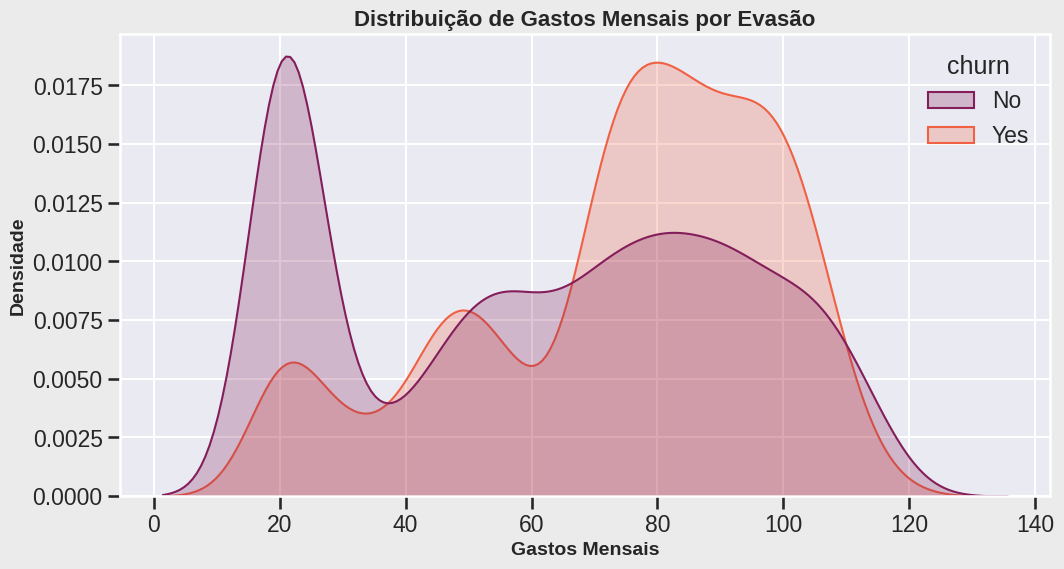

In [107]:
# Contagem de Evasão por Variáveis Numéricas

plt.figure(figsize=(12, 6), facecolor="#ebebeb")
sns.kdeplot(data=df_clean, x='charges_monthly', hue='churn', fill=True, common_norm=False, palette='rocket')
plt.title('Distribuição de Gastos Mensais por Evasão', fontsize=16, weight='bold')
plt.xlabel('Gastos Mensais', fontsize=14, weight='bold')
plt.ylabel('Densidade', fontsize=14, weight='bold')
plt.show()

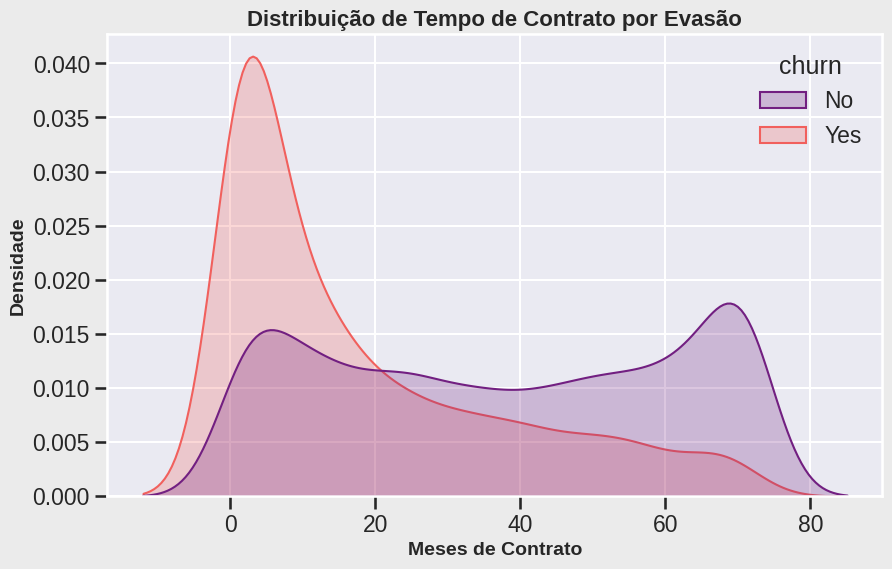

In [108]:
# Distribuição  de Meses de Contrato por Status

plt.figure(figsize=(10, 6), facecolor="#ebebeb")
sns.kdeplot(data=df_clean, x='tenure', hue='churn', fill=True, common_norm=False, palette='magma')
plt.title('Distribuição de Tempo de Contrato por Evasão', fontsize=16, weight='bold')
plt.xlabel('Meses de Contrato', fontsize=14, weight='bold')
plt.ylabel('Densidade', fontsize=14, weight='bold')
plt.show()

<ipython-input-47-370f4f9d019a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='churn', y='charges_total', palette='Set3', ax=axes[0])
<ipython-input-47-370f4f9d019a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='churn', y='tenure', palette='Set3', ax=axes[1])


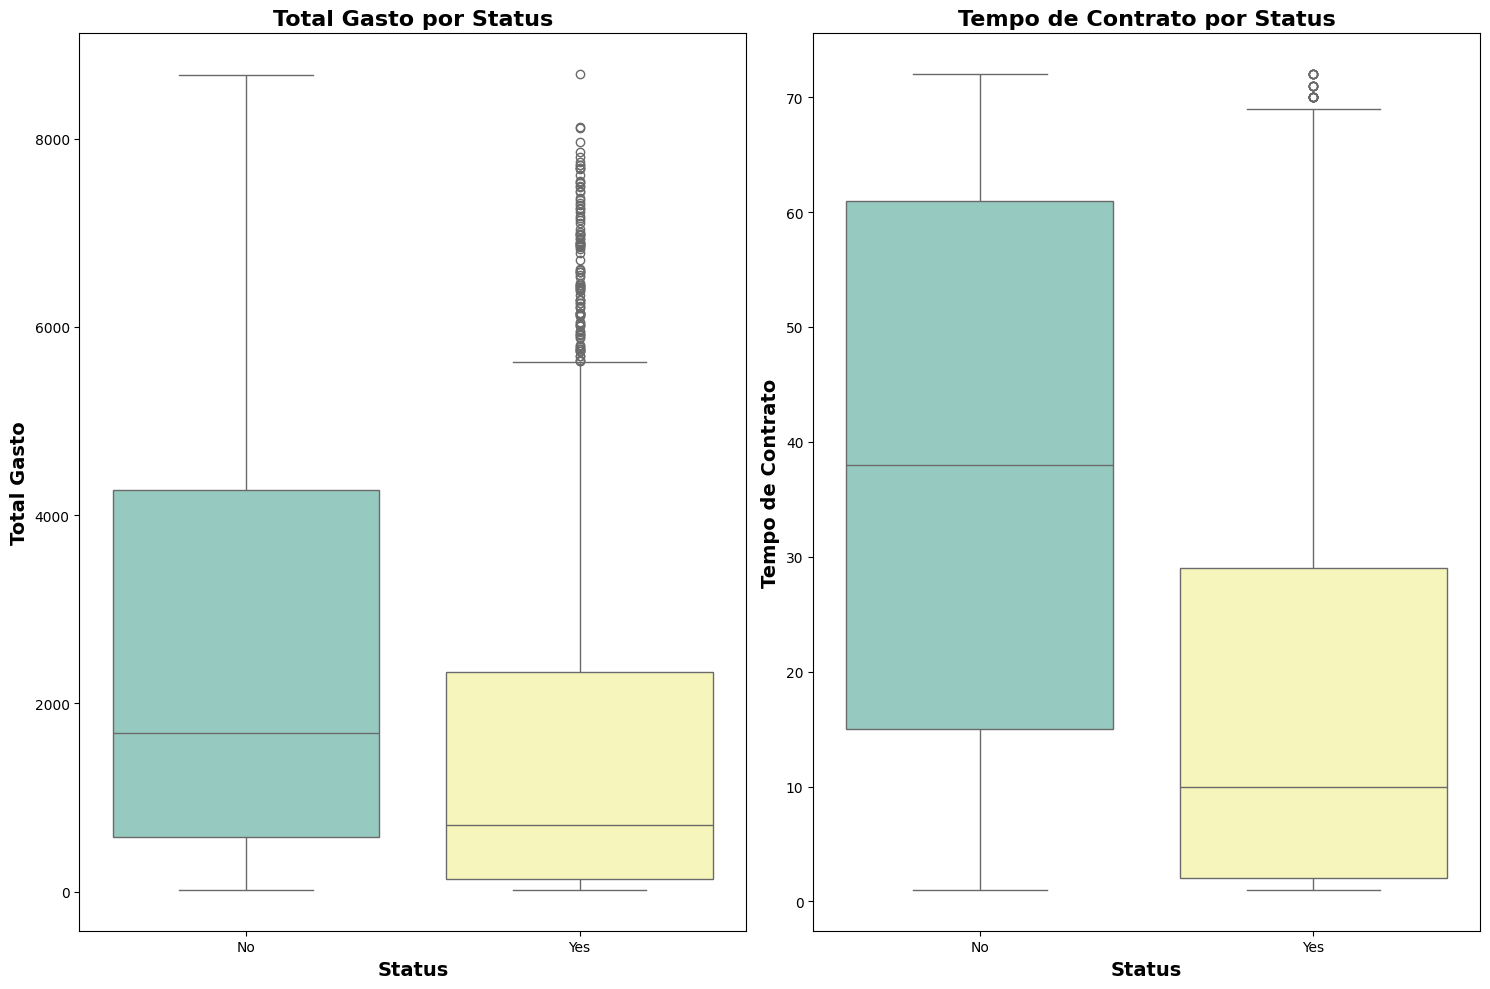

In [47]:
# Gráfico para Comparação Visual Direta

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(data=df_clean, x='churn', y='charges_total', palette='Set3', ax=axes[0])
axes[0].set_title('Total Gasto por Status', fontsize=16, weight='bold')
axes[0].set_xlabel('Status', fontsize=14, weight='bold')
axes[0].set_ylabel('Total Gasto', fontsize=14, weight='bold')

sns.boxplot(data=df_clean, x='churn', y='tenure', palette='Set3', ax=axes[1])
axes[1].set_title('Tempo de Contrato por Status', fontsize=16, weight='bold')
axes[1].set_xlabel('Status', fontsize=14, weight='bold')
axes[1].set_ylabel('Tempo de Contrato', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

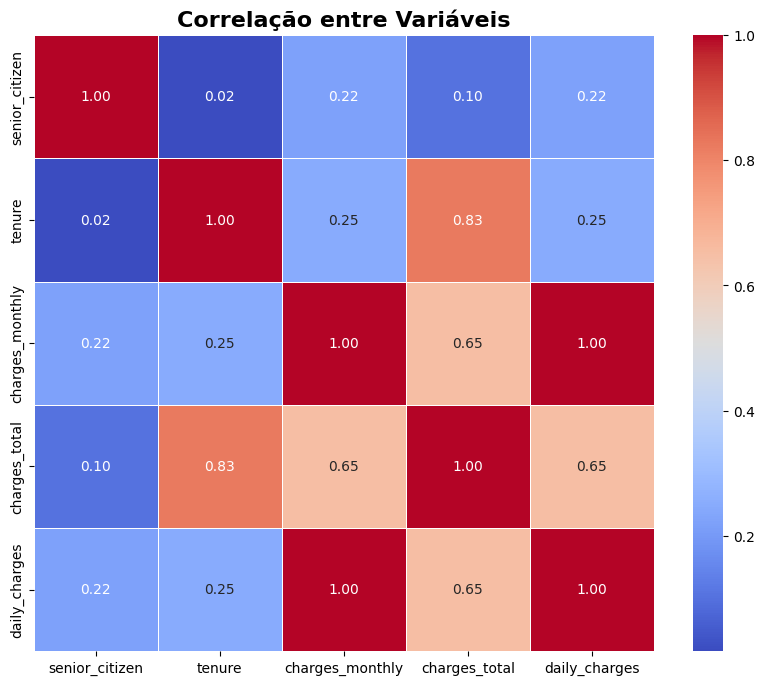

In [48]:
# Análise de Correlação entre Variáveis

correlation = df_clean.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Variáveis', fontsize=16, weight='bold')
plt.show()

# **RELATÓRIO**
##**1. Introdução**

A evasão dos clientes, na variável 'churn', é um dos principais desafios enfrentados por empresas de serviço recorrentes, esta análise tem como objetivo identificar padrões e características dos clientes que cancelam seus serviços, utilizando dados históricos da empresa. Com isso, buscamos, nessa análise, oferecer insights que possam apoiar estratégias de retenção de clientes.

##**2. Limpeza e Tratamento dos Dados**



*   Importação do dataset e bibliotecas
*   Conversão das colunas numéricas para o tipo correto
*   Remoção de espaços, pontos e valores nulos
*   Padronização dos tipos de dados para análise

##**3. Análise Explratória de Dados (EDA)**

A análise exploratória foi conduzida com o objetivo de identificar padrões entre clientes que cancelaram o serviço e os que permaneceram.
Esta etapa inclui a exploração das variáveis categóricas quanto numéricas.

Explorando variáveis categóricas:

*   Gênero(gender)
*   Tipo de Contrato(contract)
*   Método de Pagamento(payment_method)
*   Serviço de Internet(internet_service)

Explorando variáveis numércias:

*   Total Gasto(charges_total)
*   Tempo de Contrato(tenure)

Essa etapa foi essencial para gerar visualizções que sustentaram nossas conclusões e que embasam as recomendações.

##**4. Conclusões e Insights**

*   Clientes com menor tempo de contrato e menor gasto total são os que mais cancelam o serviço.
*   O tipo de contrato tem forte influência: clientes com contrato mensal apresentam maior evasão.
*   Métodos de pagamentos como fatura eletrônica estão mais associados ao churn, talvez por facilidade de cancelamento ou menor vínculo.
*   Gênero e tipo de internet mostraram pouca influência isolada, mas podem ser úteis em conbinação com outras variáveis.

##**5. Recomendações**

Com base na análise, sugerimos as seguintes ações:


1.   Incentivar contratos anuais ou bianuais, oferecendo descontos progressivos ou benefícios exclusivos.
2.   Intervir nos primeiros meses de contrato, com onboarding mais eficiente e acompanhamento personalizado.
3.   Criar campanhas específicas para usuários com baixo gasto, para aumentar o valor percebido do serviço.
4.   Avaliar e melhorar a experiência de quem utiliza fatura eletrônica, pois apresentam maior propensão ao cancelamento.
5.   Utilizar esse estudo como base para um modelo preditivo de churn para ações proativas com alto risco de evasão.




